In [1]:
import pandas as pd
import numpy as np

In [2]:
#Data loading:
Phenotypes = pd.read_csv(r"C:\Users\Ella Katz\Desktop\Post-doc\Personal\Springboard\git_hub_projects\Second_capstone\Datasets\All_Data_emmeans_info_V1.csv")
Classifications = pd.read_csv(r"C:\Users\Ella Katz\Desktop\Post-doc\Personal\Springboard\git_hub_projects\Second_capstone\Datasets\Seeds_classification.csv")
Environmental_data = pd.read_csv(r"C:\Users\Ella Katz\Desktop\Post-doc\Personal\Springboard\git_hub_projects\Second_capstone\Datasets\Environmental_data.csv")

In [3]:
print(Phenotypes.shape)
print(Classifications.shape)
print(Environmental_data.shape)
print("HI")

(3888, 48)
(797, 2)
(1131, 212)
HI


In [13]:
print(Phenotypes.head())
print(Classifications.head())
print(Environmental_data.head())

  CS_number         name country  latitude  longitude     collector seq_by  \
0   CS76347      Aitba-2     MAR   31.4800      0.000             0    MPI   
1   CS76347      Aitba-2     MAR   31.4800      0.000             0    MPI   
2   CS76347      Aitba-2     MAR   31.4800      0.000             0    MPI   
3   CS76347      Aitba-2     MAR   31.4800      0.000             0    MPI   
4   CS76350  Vezzano-2.2     ITA   46.6297     10.817  Joerg Wunder    MPI   

  Experiment N_source  N_concentration  ... Aliphatic   Indolic        C3  \
0          C  NH4HCO3              0.1  ...  1.175086  0.166070  0.776150   
1          C  NH4HCO3              1.0  ...  3.728467  0.424037  3.111164   
2          C     KNO3              0.1  ...  0.348629  0.072737  0.210332   
3          C     KNO3              1.0  ...  0.397285  0.044411  0.244144   
4          C     KNO3              1.0  ...  0.477350  0.043457  0.269797   

         C4  C3_ratio           Alk          GSOH        SC        L

In [4]:
for col in Phenotypes.columns:
    print(col)

CS_number
name
country
latitude
longitude
collector
seq_by
Experiment
N_source
N_concentration
N_treatment
Leaf_Area
Total_roots
PR_length
Number_of_LR
Total_LR
LR_density
LR_length
LR_to_total_roots
LR_to_PR
X2MSO
X3OHP
X4OHB
X3MSO
OH_3_Butenyl
X4MSO
Allyl
X5MSO
Branches
X3_Butenyl
X6MSO
X3MT
X7MSO
X4_Pentenyl
X4MT
X8MSO
I3M
X4MOI3M
Aliphatic
Indolic
C3
C4
C3_ratio
Alk
GSOH
SC
LC
Total_GSL


In [5]:
#Data joining:
Data = pd.merge(Phenotypes, Classifications, how="left", on="CS_number")
Data_1 = pd.merge(Data, Environmental_data, how="left", on="CS_number")

print(Phenotypes.shape)
print(Environmental_data.shape)
print(Data_1.shape)

(3888, 48)
(1131, 212)
(3888, 260)


In [6]:
for col in Data_1.columns:
    print(col)

CS_number
name_x
country_x
latitude
longitude
collector
seq_by
Experiment
N_source
N_concentration
N_treatment
Leaf_Area
Total_roots
PR_length
Number_of_LR
Total_LR
LR_density
LR_length
LR_to_total_roots
LR_to_PR
X2MSO
X3OHP
X4OHB
X3MSO
OH_3_Butenyl
X4MSO
Allyl
X5MSO
Branches
X3_Butenyl
X6MSO
X3MT
X7MSO
X4_Pentenyl
X4MT
X8MSO
I3M
X4MOI3M
Aliphatic
Indolic
C3
C4
C3_ratio
Alk
GSOH
SC
LC
Total_GSL
Seeds_classification
lng
lat
id
name_y
country_y
group
CO_Spring
CO_Summer
NO2_Spring
NO2_Summer
O3_Spring
O3_Summer
SIB3_carbon_flux_spring
SIB3_carbon_flux_summer
UV_index_spring
UV_index_summer
Solar_insolation_spring
Solar_insolation_summer
Net_radiation_spring
Net_radiation_summer
WATER_EQUIVALENT_ANOMALY_spring
WATER_EQUIVALENT_ANOMALY_summer
Rainfall_spring
Rainfall_summer
Precipitable_water_spring
Precipitable_water_summer
LTemp_day_spring
LTemp_day_summer
Ltemp__night_spring
Ltemp__night_summer
NDVI_Spring
NDVI_Summer
LAI_Spring
LAI_Summer
PET
ET
LE
Aridity_index
Climatic_water_deficit


In [7]:
#Data Organization:
#Deleting duplicated and unnecessary columns:
Data_2 = Data_1
Data_2 = Data_2.drop(["name_x", "country_x", "collector", "seq_by", "lng", "lat", "name_y", "country_y"], axis=1)

In [9]:
Data_2.head(2)

,CS_number,latitude,longitude,Experiment,N_source,N_concentration,N_treatment,Leaf_Area,Total_roots,PR_length,...,Distance_to_the_coast,Bailey_ecoregions,Land_cover_2000,UMD_Land_cover_classification,Distribution_of_Cultivation_Intensity,Koppen_Geiger,Geological_ages,Soil_types,SoilGrids_TAXNWRB,SoilGrids_TAXOUSDA
0,CS76347,31.48,0.0,C,NH4HCO3,0.1,NH4HCO3_0.1,5.314220,52.580000,42.595,...,196.0,Shrub-forest-meadow of Mediterranean climate,"Tree Cover, broadleaved, deciduous, closed",Wooded_Grassland/Shrubs,Tall/medium/short grassland with less than 10 ...,Arid/Steppe/Hot,Triassic,4.0,Rendzic Leptosols,Xerolls
1,CS76347,31.48,0.0,C,NH4HCO3,1.0,NH4HCO3_1,8.452896,81.236667,48.290,...,196.0,Shrub-forest-meadow of Mediterranean climate,"Tree Cover, broadleaved, deciduous, closed",Wooded_Grassland/Shrubs,Tall/medium/short grassland with less than 10 ...,Arid/Steppe/Hot,Triassic,4.0,Rendzic Leptosols,Xerolls


In [10]:
#Data Definition:
print(Data_2.iloc[:, 0:50].dtypes)

CS_number                object
latitude                float64
longitude               float64
Experiment               object
N_source                 object
N_concentration         float64
N_treatment              object
Leaf_Area               float64
Total_roots             float64
PR_length               float64
Number_of_LR            float64
Total_LR                float64
LR_density              float64
LR_length               float64
LR_to_total_roots       float64
LR_to_PR                float64
X2MSO                   float64
X3OHP                   float64
X4OHB                   float64
X3MSO                   float64
OH_3_Butenyl            float64
X4MSO                   float64
Allyl                   float64
X5MSO                   float64
Branches                float64
X3_Butenyl              float64
X6MSO                   float64
X3MT                    float64
X7MSO                   float64
X4_Pentenyl             float64
X4MT                    float64
X8MSO   

In [11]:
#Changing floats to objects:
Data_2 = Data_2.astype({"N_concentration": 'object', "id": 'object'})
print(Data_2.iloc[:, 0:50].dtypes)

CS_number                object
latitude                float64
longitude               float64
Experiment               object
N_source                 object
N_concentration          object
N_treatment              object
Leaf_Area               float64
Total_roots             float64
PR_length               float64
Number_of_LR            float64
Total_LR                float64
LR_density              float64
LR_length               float64
LR_to_total_roots       float64
LR_to_PR                float64
X2MSO                   float64
X3OHP                   float64
X4OHB                   float64
X3MSO                   float64
OH_3_Butenyl            float64
X4MSO                   float64
Allyl                   float64
X5MSO                   float64
Branches                float64
X3_Butenyl              float64
X6MSO                   float64
X3MT                    float64
X7MSO                   float64
X4_Pentenyl             float64
X4MT                    float64
X8MSO   

In [12]:
print(Data_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 3887
Columns: 252 entries, CS_number to SoilGrids_TAXOUSDA
dtypes: float64(236), object(16)
memory usage: 7.5+ MB
None


In [13]:
Data_2.iloc[:, 7:45].describe()

,Leaf_Area,Total_roots,PR_length,Number_of_LR,Total_LR,LR_density,LR_length,LR_to_total_roots,LR_to_PR,X2MSO,...,Aliphatic,Indolic,C3,C4,C3_ratio,Alk,GSOH,SC,LC,Total_GSL
count,3883.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,2934.000000,3888.000000,3888.000000,3.888000e+03,...,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,2642.000000,2642.000000,6.900000e+02,3.888000e+03,3.888000e+03,3888.000000
mean,7.847867,69.581121,43.087813,3.794877,26.495104,0.079033,5.932558,0.206131,0.482134,1.912676e-04,...,5.198474e-01,7.523269e-02,2.986454e-01,1.480641e-01,0.701771,0.739191,3.800391e-01,4.467095e-01,6.828254e-02,0.594798
std,6.094301,54.001416,18.053545,4.721304,41.403396,0.085054,3.950685,0.196503,0.611156,8.599780e-03,...,1.054713e+00,3.002873e-01,6.765920e-01,7.099700e-01,0.443693,0.400401,3.459927e-01,9.474815e-01,1.761011e-01,1.195377
min,0.000000,2.356000,2.356000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.093565,34.543000,29.933750,0.333333,0.188833,0.006221,3.100635,0.004185,0.004524,1.630000e-17,...,3.620000e-13,4.660000e-14,2.747500e-14,0.000000e+00,0.017450,0.500000,6.945000e-15,1.130000e-13,7.072500e-15,0.045625
50%,6.019308,51.200000,43.073000,2.000000,8.719886,0.057440,5.279170,0.171639,0.262955,2.400000e-17,...,2.195119e-01,2.704375e-02,2.268433e-02,2.840000e-15,1.000000,1.000000,3.591729e-01,1.763468e-01,1.677976e-02,0.262498
75%,9.665373,87.627076,55.704227,5.500000,34.445833,0.122500,7.891394,0.341926,0.720393,3.192500e-17,...,6.198817e-01,7.548677e-02,3.508087e-01,2.520000e-13,1.000000,1.000000,5.992225e-01,5.280321e-01,7.434900e-02,0.687701
max,59.278188,379.778000,119.585000,32.000000,300.046500,1.108214,45.150420,0.810382,4.273764,4.463347e-01,...,3.193861e+01,1.445273e+01,1.533876e+01,2.947577e+01,1.000000,1.000000,1.000000e+00,2.947577e+01,4.777901e+00,36.272819


In [14]:
Data_2['CS_number'].describe()

count        3888
unique       1021
top       CS78774
freq            4
Name: CS_number, dtype: object

In [15]:
Data_2['N_treatment'].describe()

count       3888
unique         4
top       KNO3_1
freq         979
Name: N_treatment, dtype: object

In [16]:
print(Data_2['Seeds_classification'].value_counts())

Allyl      1295
OH-But      705
3OHP        424
4MSO        191
3MSO         87
Butenyl      36
4OHB          8
Name: Seeds_classification, dtype: int64


In [17]:
print(Data_2['Experiment'].value_counts())

R    240
M    238
N    237
F    236
O    236
K    236
L    234
Q    233
J    233
H    227
D    221
I    221
P    217
G    217
E    210
C    191
A    115
B     97
S     49
Name: Experiment, dtype: int64


In [18]:
#Calculating some statistics for different phenotypes by treatments:
Data_2[["N_treatment", "Leaf_Area", "Total_roots", "PR_length", "Total_GSL"]].groupby("N_treatment").mean()

,Leaf_Area,Total_roots,PR_length,Total_GSL
N_treatment,,,,
KNO3_0.1,7.322922,73.854633,44.269392,0.407341
KNO3_1,11.350120,88.772517,48.741566,0.310250
NH4HCO3_0.1,6.223468,62.087555,41.520168,0.891707
NH4HCO3_1,6.462975,53.463624,37.773526,0.770718


In [19]:
#Count missing values in relevant columns:
print(Data_2.iloc[:, 0:10].isnull().sum())
print("Number of samples without GSL data:", Data_2['Total_GSL'].isnull().sum())

CS_number           0
latitude           11
longitude          11
Experiment          0
N_source            0
N_concentration     0
N_treatment         0
Leaf_Area           5
Total_roots         0
PR_length           0
dtype: int64
Number of samples without GSL data: 0


In [20]:
#Finding CS_numbers of missing values in latitude and longitude:
Data_2.loc[Data_2['latitude'].isnull()]

,CS_number,latitude,longitude,Experiment,N_source,N_concentration,N_treatment,Leaf_Area,Total_roots,PR_length,...,Distance_to_the_coast,Bailey_ecoregions,Land_cover_2000,UMD_Land_cover_classification,Distribution_of_Cultivation_Intensity,Koppen_Geiger,Geological_ages,Soil_types,SoilGrids_TAXNWRB,SoilGrids_TAXOUSDA
327,CS76470,NaN,NaN,D,NH4HCO3,0.1,NH4HCO3_0.1,6.227962,45.425000,39.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,CS76470,NaN,NaN,D,NH4HCO3,1.0,NH4HCO3_1,5.374139,40.755000,40.755000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,CS76470,NaN,NaN,D,KNO3,1.0,KNO3_1,5.971807,37.755000,34.485000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,CS76470,NaN,NaN,D,KNO3,0.1,KNO3_0.1,10.339372,123.836667,44.603333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,CS76543,NaN,NaN,E,NH4HCO3,1.0,NH4HCO3_1,4.806581,47.033333,46.343333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,CS76543,NaN,NaN,E,NH4HCO3,0.1,NH4HCO3_0.1,6.105477,137.590000,66.085000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,CS76543,NaN,NaN,E,KNO3,0.1,KNO3_0.1,8.114817,76.455000,53.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,CS76588,NaN,NaN,E,KNO3,1.0,KNO3_1,7.177197,91.420000,59.760000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,CS76588,NaN,NaN,E,NH4HCO3,1.0,NH4HCO3_1,4.933632,36.950000,32.070000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,CS76588,NaN,NaN,E,NH4HCO3,0.1,NH4HCO3_0.1,4.093238,38.060000,31.190000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
Data_2.loc[Data_2['Total_GSL'].isnull()]
Data_2.loc[Data_2['Total_roots'].isnull()]

,CS_number,latitude,longitude,Experiment,N_source,N_concentration,N_treatment,Leaf_Area,Total_roots,PR_length,...,Distance_to_the_coast,Bailey_ecoregions,Land_cover_2000,UMD_Land_cover_classification,Distribution_of_Cultivation_Intensity,Koppen_Geiger,Geological_ages,Soil_types,SoilGrids_TAXNWRB,SoilGrids_TAXOUSDA


In [22]:
#Create a new column combining CS_number and N_treatment:
Data_2['Identifier'] = Data_2[['CS_number', 'N_treatment']].apply(lambda x: ''.join(x), axis=1)
#Reorgnize the columns:
cols = Data_2.columns.tolist()
cols = cols[-1:] + cols[:-1]
Data_2 = Data_2[cols]
print(Data_2.iloc[:, 0:10].dtypes)

Identifier          object
CS_number           object
latitude           float64
longitude          float64
Experiment          object
N_source            object
N_concentration     object
N_treatment         object
Leaf_Area          float64
Total_roots        float64
dtype: object


In [23]:
#Check that there are no duplicates:
Data_2['Identifier'].is_unique

True

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings

In [26]:
#Subsetting the data to the 4 different nitrogen sources:
NO3_01 = Data_2.loc[Data_2['N_treatment'] == 'KNO3_0.1']
NO3_1 = Data_2.loc[Data_2['N_treatment'] == 'KNO3_1']
NH4_01 = Data_2.loc[Data_2['N_treatment'] == 'NH4HCO3_0.1']
NH4_1 = Data_2.loc[Data_2['N_treatment'] == 'NH4HCO3_1']

In [31]:
print(NO3_01.iloc[:, 0:50].dtypes)

Identifier               object
CS_number                object
latitude                float64
longitude               float64
Experiment               object
N_source                 object
N_concentration          object
N_treatment              object
Leaf_Area               float64
Total_roots             float64
PR_length               float64
Number_of_LR            float64
Total_LR                float64
LR_density              float64
LR_length               float64
LR_to_total_roots       float64
LR_to_PR                float64
X2MSO                   float64
X3OHP                   float64
X4OHB                   float64
X3MSO                   float64
OH_3_Butenyl            float64
X4MSO                   float64
Allyl                   float64
X5MSO                   float64
Branches                float64
X3_Butenyl              float64
X6MSO                   float64
X3MT                    float64
X7MSO                   float64
X4_Pentenyl             float64
X4MT    

<ipython-input-61-673d9554c7cc>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


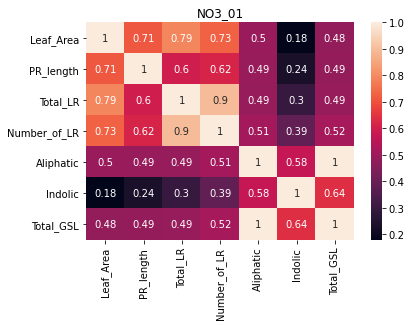

<ipython-input-61-673d9554c7cc>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


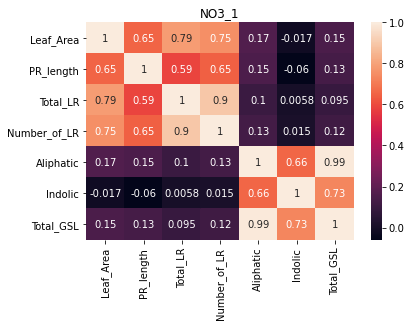

<ipython-input-61-673d9554c7cc>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


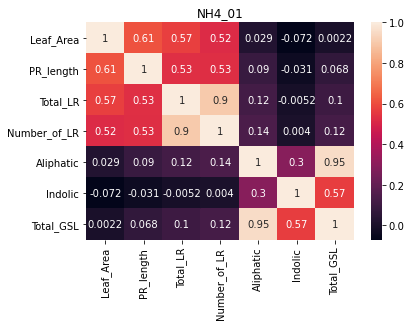

<ipython-input-61-673d9554c7cc>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


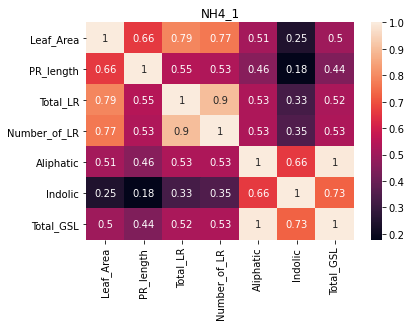

In [61]:
#I chose 7 phenotypes that I thought can nicely describe most of the "behaviours" of the plants, and I will continue to work 
#with those phenotypes.
#heatmaps between the traits:
#plt.figure(figsize=(40,20))
sns.heatmap(NO3_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL']].corr(), annot=True)
ax = plt.axes()
ax.set_title('NO3_01')
plt.show()

sns.pairplot(NO3_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL']])
plt.show()






In [ ]:
sns.heatmap(NO3_1.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL']].corr(), annot=True)
ax = plt.axes()
ax.set_title('NO3_1')
plt.show()

sns.pairplot(NO3_1.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL']])
plt.show()

In [ ]:
sns.heatmap(NH4_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL']].corr(), annot=True)
ax = plt.axes()
ax.set_title('NH4_01')
plt.show()

sns.pairplot(NH4_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL']])
plt.show()

In [ ]:
sns.heatmap(NH4_1.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL']].corr(), annot=True)
ax = plt.axes()
ax.set_title('NH4_1')
plt.show()



In [ ]:
#It looks like for all the nitrogen conditions there is a nice correlation between all the roots phenotypes, and between the
#Aliphatics and Total GSLs phenotypes. 

<ipython-input-65-85b6514485d6>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


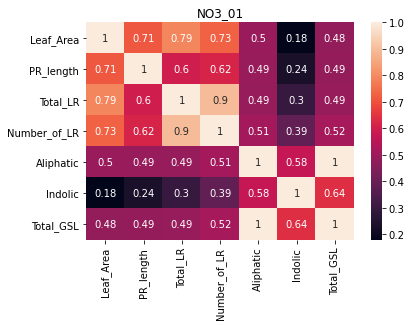

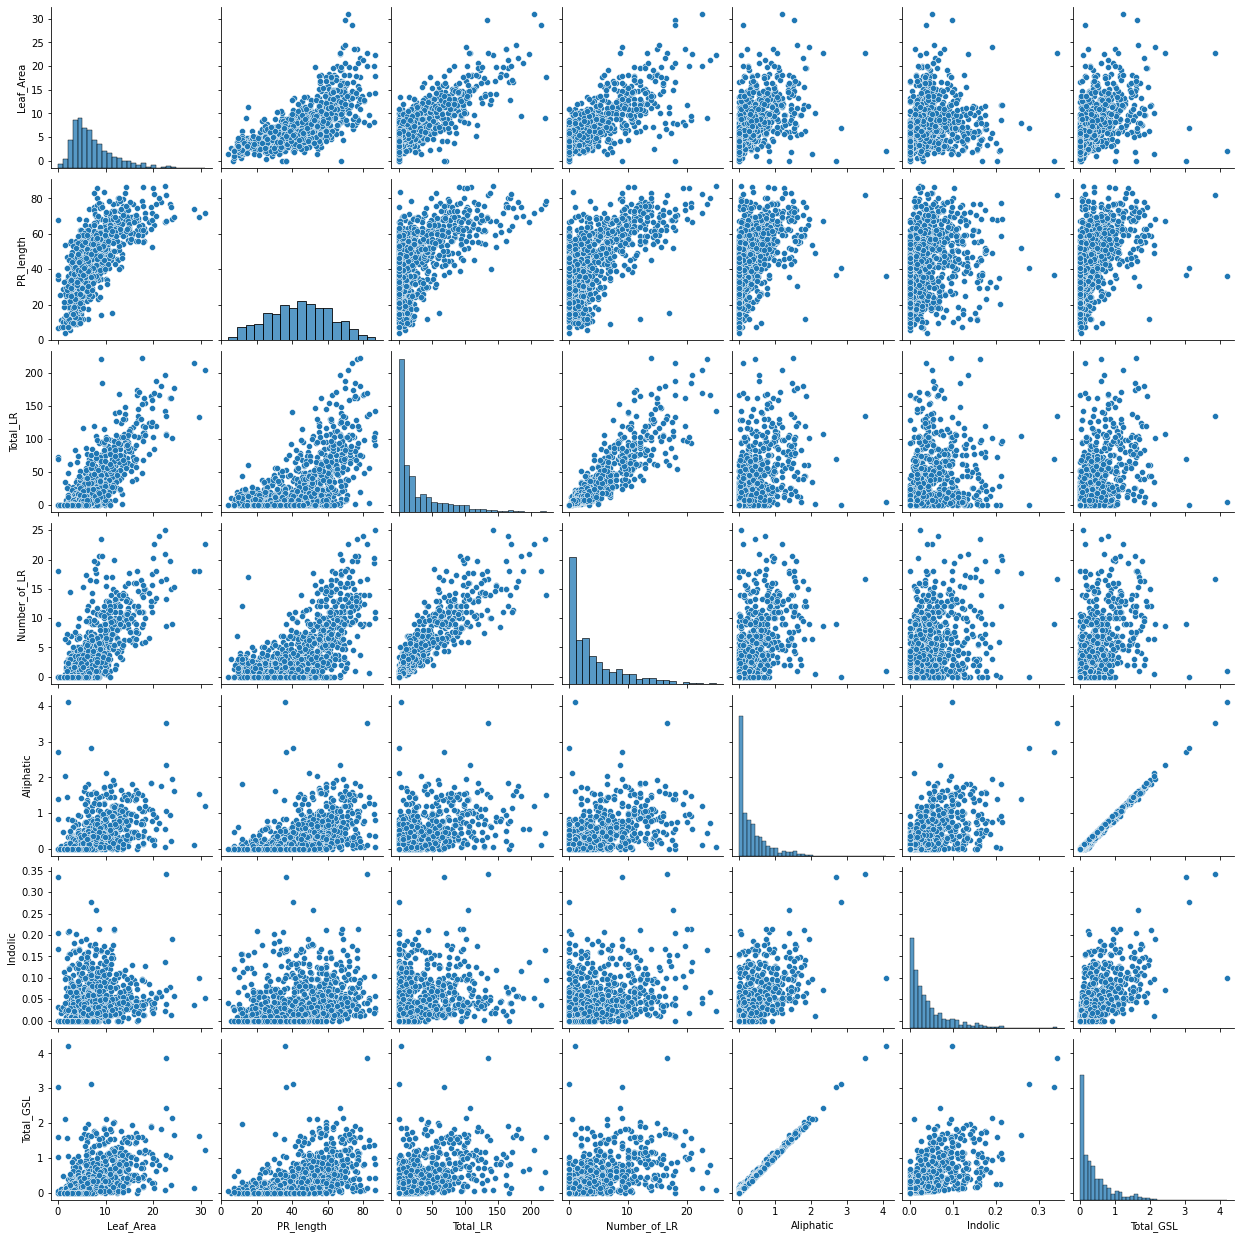

In [65]:
sns.heatmap(NO3_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL']].corr(), annot=True)
ax = plt.axes()
ax.set_title('NO3_01')
plt.show()

sns.pairplot(NO3_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL']])
plt.show()